In [2]:
import numpy as np
import pandas as pd

In [3]:
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
family_income_data = pd.read_csv("C:\\Users\\mmnri\\Desktop\\Savings.csv")

In [4]:
expenditures = [column for column in family_income_data.columns if 'Test' in column]

In [5]:
X = family_income_data.loc[:, expenditures]
y = family_income_data['Saving by Month']
X


,Monthly Expenses Test,Monthly Household Income Test,Saving rate Test
0,27002.50000,40027.666670,32.540410
1,17380.66667,16519.583330,-5.212500
2,8216.50000,6898.750000,-19.101286
3,10876.58333,8965.750000,-21.312588
4,15396.83333,15776.833330,2.408595
...,...,...,...
41539,15036.75000,9981.083333,-50.652484
41540,12955.08333,11443.333330,-13.210749
41541,10423.08333,11097.583330,6.077900
41542,18085.41667,10791.666670,-67.586873


In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, precision_score,recall_score, classification_report, confusion_matrix

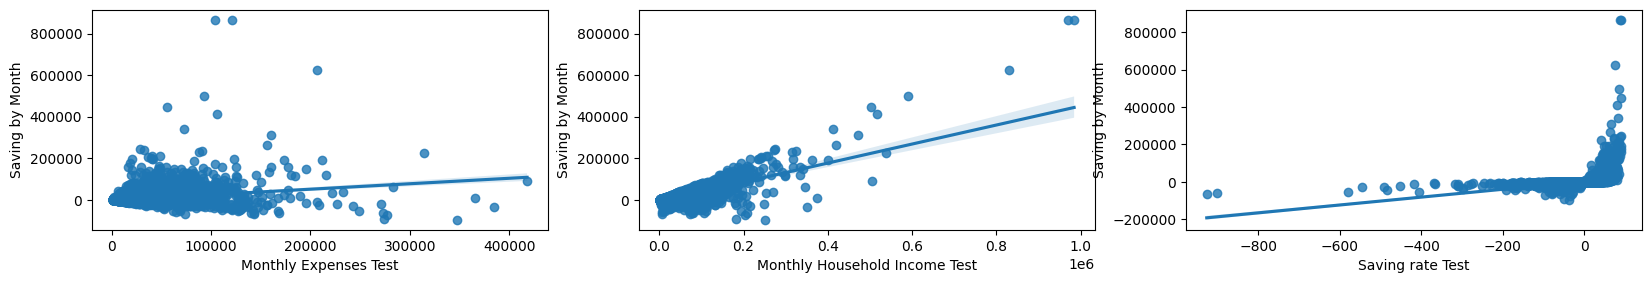

In [7]:
plt.figure(figsize=(20, 20))
i = 1
for exp in expenditures :
    plt.subplot(6,3,i)
    sns.regplot(x=X[exp], y=y)
    i += 1

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [21]:
rfr = RandomForestRegressor(verbose=True, n_jobs=-1, n_estimators=10)
rfr = RandomForestRegressor(oob_score=True)
rfr.fit(X_train, y_train)

RandomForestRegressor(oob_score=True)

In [ ]:
fig = plt.figure(figsize=(8, 6))

feature_imp = pd.Series(rfr.feature_importances_, 
                        index=['TOINC Test', 'TOTALSAVINGS Test']).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", pad=15, size=14)
plt.savefig('Barplot.png')

In [18]:
rfr.score(X_test, y_test)

0.9968839994118446

In [19]:
rfr.predict([[80000,50000,-60.5]])

C:\Users\mmnri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([-30614.7524956])

In [20]:
rfr.oob_score_

0.9820004494525958

In [13]:
from sklearn import metrics

y_pred = rfr.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred)) 
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))


MAE:  84.36549520545535
MSE:  707466.4361369814
RMSE:  841.1102401807871
Mean Absolute Percentage Error (MAPE): 0.013249915762297306


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished


In [51]:
import pickle

In [52]:
pickle.dump(rfr,open('modelrfrFinal.pkl', 'wb'))